# Imports

In [2]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from numpy import arange
from matplotlib.ticker import MaxNLocator
from pathlib import Path

# Configs

In [3]:
data_path = Path(r'..\..\01_dados\dados_hidraulicas_mre_x_dados_ons\ccee_hidraulicas_mre_x_dados_ons.csv')
data_weekly = Path(r'..\..\01_dados\dados_ons_merged\cmo-semanal\cmo-semanal.csv')
plot_path = Path(r'..\..\05_plots')

warnings.filterwarnings('ignore')

# Importação dos dados

In [6]:
df_daily = pd.read_csv(data_path)
df_weekly = pd.read_csv(data_weekly, sep= ';')

In [8]:
df_weekly['din_instante'] = pd.to_datetime(df_weekly['din_instante'],
                                           format='%d/%m/%Y')

In [10]:
#df_weekly

,id_subsistema,nom_subsistema,din_instante,val_cmomediasemanal,val_cmoleve,val_cmomedia,val_cmopesada
0,N,NORTE,2005-01-07,94000000,94000000,94000000,94000000
1,NE,NORDESTE,2005-01-07,94000000,94000000,94000000,94000000
2,S,SUL,2005-01-07,450.000.000,439.000.000,459.000.000,459.000.000
3,SE,SUDESTE,2005-01-07,"0,00E+00","0,00E+00","0,00E+00","0,00E+00"
4,N,NORTE,2005-01-14,634.000.000,587.000.000,641.000.000,764.000.000
...,...,...,...,...,...,...,...
3855,SE,SUDESTE,2023-06-23,"0,00E+00","0,00E+00","0,00E+00","0,00E+00"
3856,N,NORTE,2023-06-30,"0,00E+00","0,00E+00","0,00E+00","0,00E+00"
3857,NE,NORDESTE,2023-06-30,"0,00E+00","0,00E+00","0,00E+00","0,00E+00"
3858,S,SUL,2023-06-30,"0,00E+00","0,00E+00","0,00E+00","0,00E+00"


## Plot semanal

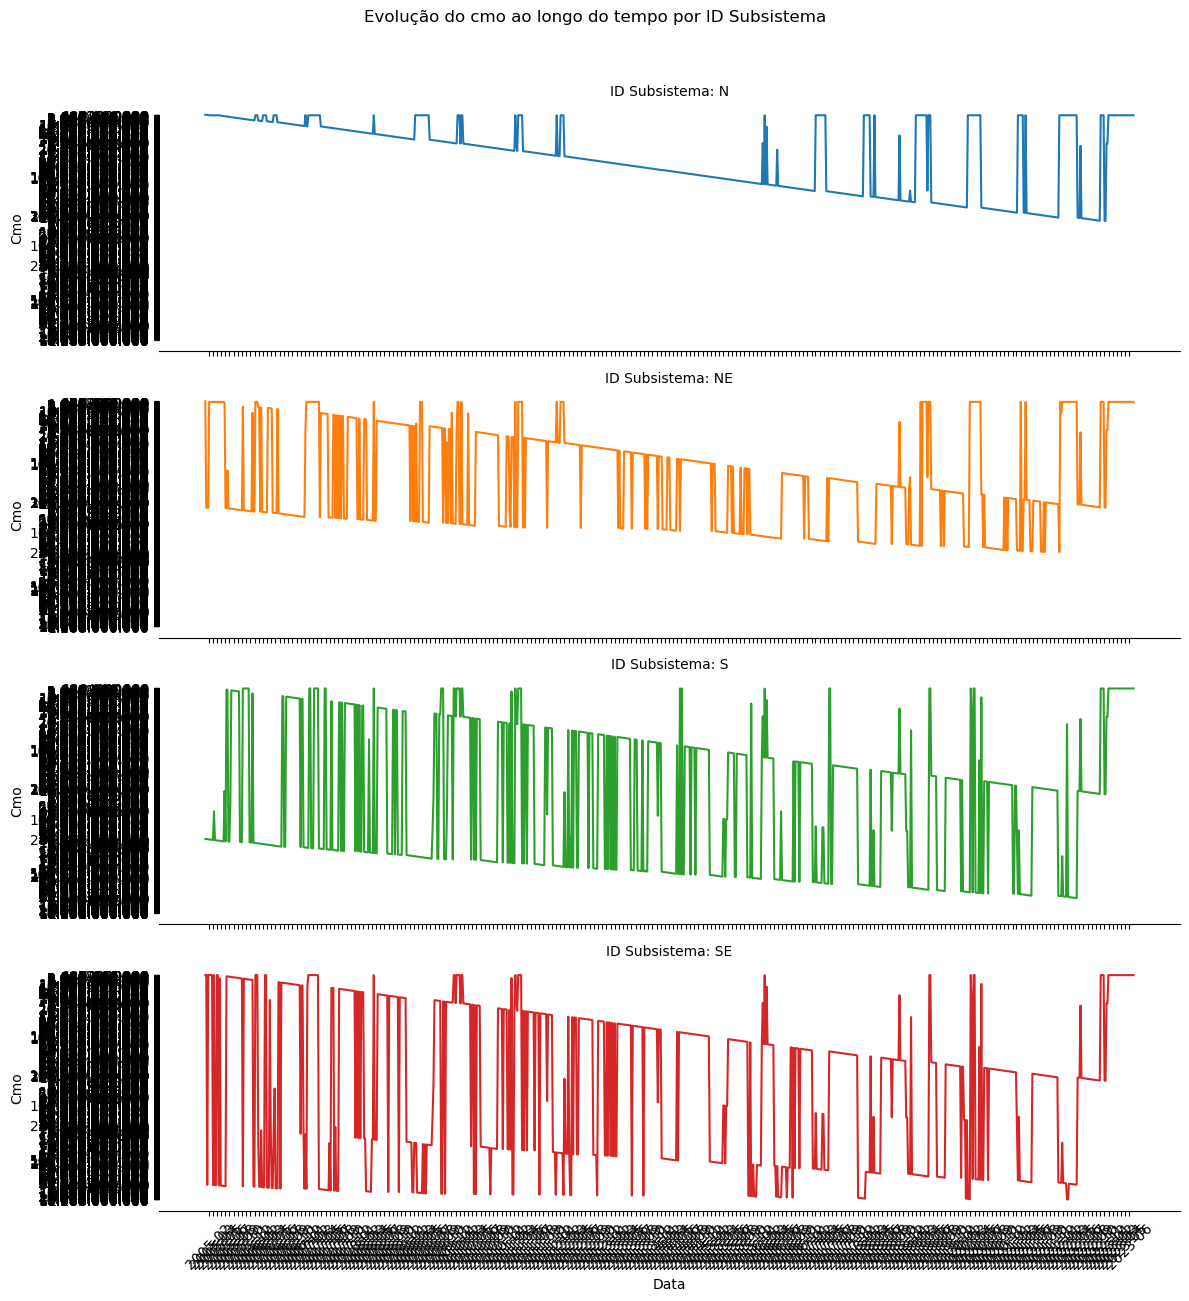

In [12]:
palette = sns.color_palette("tab10")

# Creating a grid of plots using FacetGrid
g = sns.FacetGrid(df_weekly, row="id_subsistema", hue="id_subsistema", aspect=4, palette=palette)
g.map(sns.lineplot, "din_instante", "val_cmomediasemanal")
g.set_axis_labels("Data", "Cmo")
g.set_titles("ID Subsistema: {row_name}")
g.despine(left=True)

# Create monthly date range based on your dataset's date range
start_date = df_weekly['din_instante'].min()
end_date = df_weekly['din_instante'].max()
monthly_dates = pd.date_range(start_date, end_date, freq='MS')  # MS: Month Start frequency

# Setting the x-axis to display year and month and set x-ticks for every month
date_format = DateFormatter("%Y-%m")

for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(date_format)
    ax.set_xticks(monthly_dates)
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Adding an overall title
g.fig.suptitle("Evolução do cmo ao longo do tempo por ID Subsistema", y=1.05)

# Displaying the plot
plt.savefig(plot_path / 'cmo_tempo_semanal.png')
plt.show()